<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

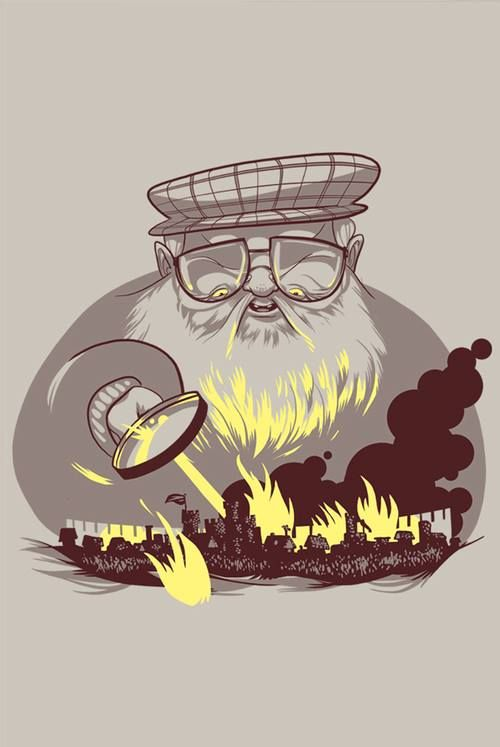

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [465]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 44.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 3.86MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [466]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [467]:
data = pd.read_csv("game_of_thrones_train.csv", index_col = "S.No")

In [468]:
data_test = pd.read_csv("game_of_thrones_test.csv", index_col = "S.No")

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [469]:
data.isnull().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [470]:
data_test.isnull().sum()

,0
name,0
title,168
male,0
culture,200
dateOfBirth,235
mother,386
father,385
heir,387
house,46
spouse,313


In [471]:
data = data[['male', 'culture', 'house', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'numDeadRelations', 'popularity', 'isAlive']]

In [472]:
data_test = data_test[['male', 'culture', 'house', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'numDeadRelations', 'popularity']]

In [473]:
data['culture'].unique()

array([nan, 'Rivermen', 'Dornish', 'Valyrian', 'Ironborn', 'Free Folk',
       'Northmen', 'Summer Isles', 'Braavosi', 'Dothraki', 'Ghiscari',
       'Vale mountain clans', 'Reach', 'Tyroshi', 'Lhazarene',
       'Free folk', 'Ironmen', 'Qartheen', 'Lysene', 'westermen',
       'Westerman', 'Qarth', 'Lyseni', 'northmen', 'Qohor', 'Westeros',
       'Norvoshi', 'First Men', 'Meereenese', 'Andal', 'Astapori',
       'Westermen', 'ironborn', 'Ghiscaricari', 'Braavos', 'Stormlands',
       'Valemen', 'Myrish', 'Lhazareen', 'Dornishmen', 'Sistermen',
       'Northern mountain clans', 'Andals', 'Vale', 'Crannogmen',
       'Wildling', 'Dorne', 'Pentoshi', 'free folk', 'Summer Islander',
       'Westerlands', 'Summer Islands'], dtype=object)

In [474]:
data['house'] = data['house'].fillna(data['house'].mode()[0])
data['culture'] = data['culture'].fillna(data['culture'].mode()[0])

data_test['house'] = data_test['house'].fillna(data_test['house'].mode()[0])
data_test['culture'] = data_test['culture'].fillna(data_test['culture'].mode()[0])

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [475]:
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

data_test['isPopular'] = data_test['popularity'].apply(lambda x: 1 if x > 0.5 else 0)
data_test['boolDeadRelations'] = data_test['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

In [476]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [477]:
def get_key_by_value(value, dictionary):
    for key, values in dictionary.items():
        if value in values:
            return key
    return value  # Если значение не найдено

In [478]:
data['culture'] = data['culture'].apply(lambda x: get_key_by_value(x, cult))
data_test['culture'] = data_test['culture'].apply(lambda x: get_key_by_value(x, cult))

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7afe778a0ee0> (for post_execute):


KeyboardInterrupt: 

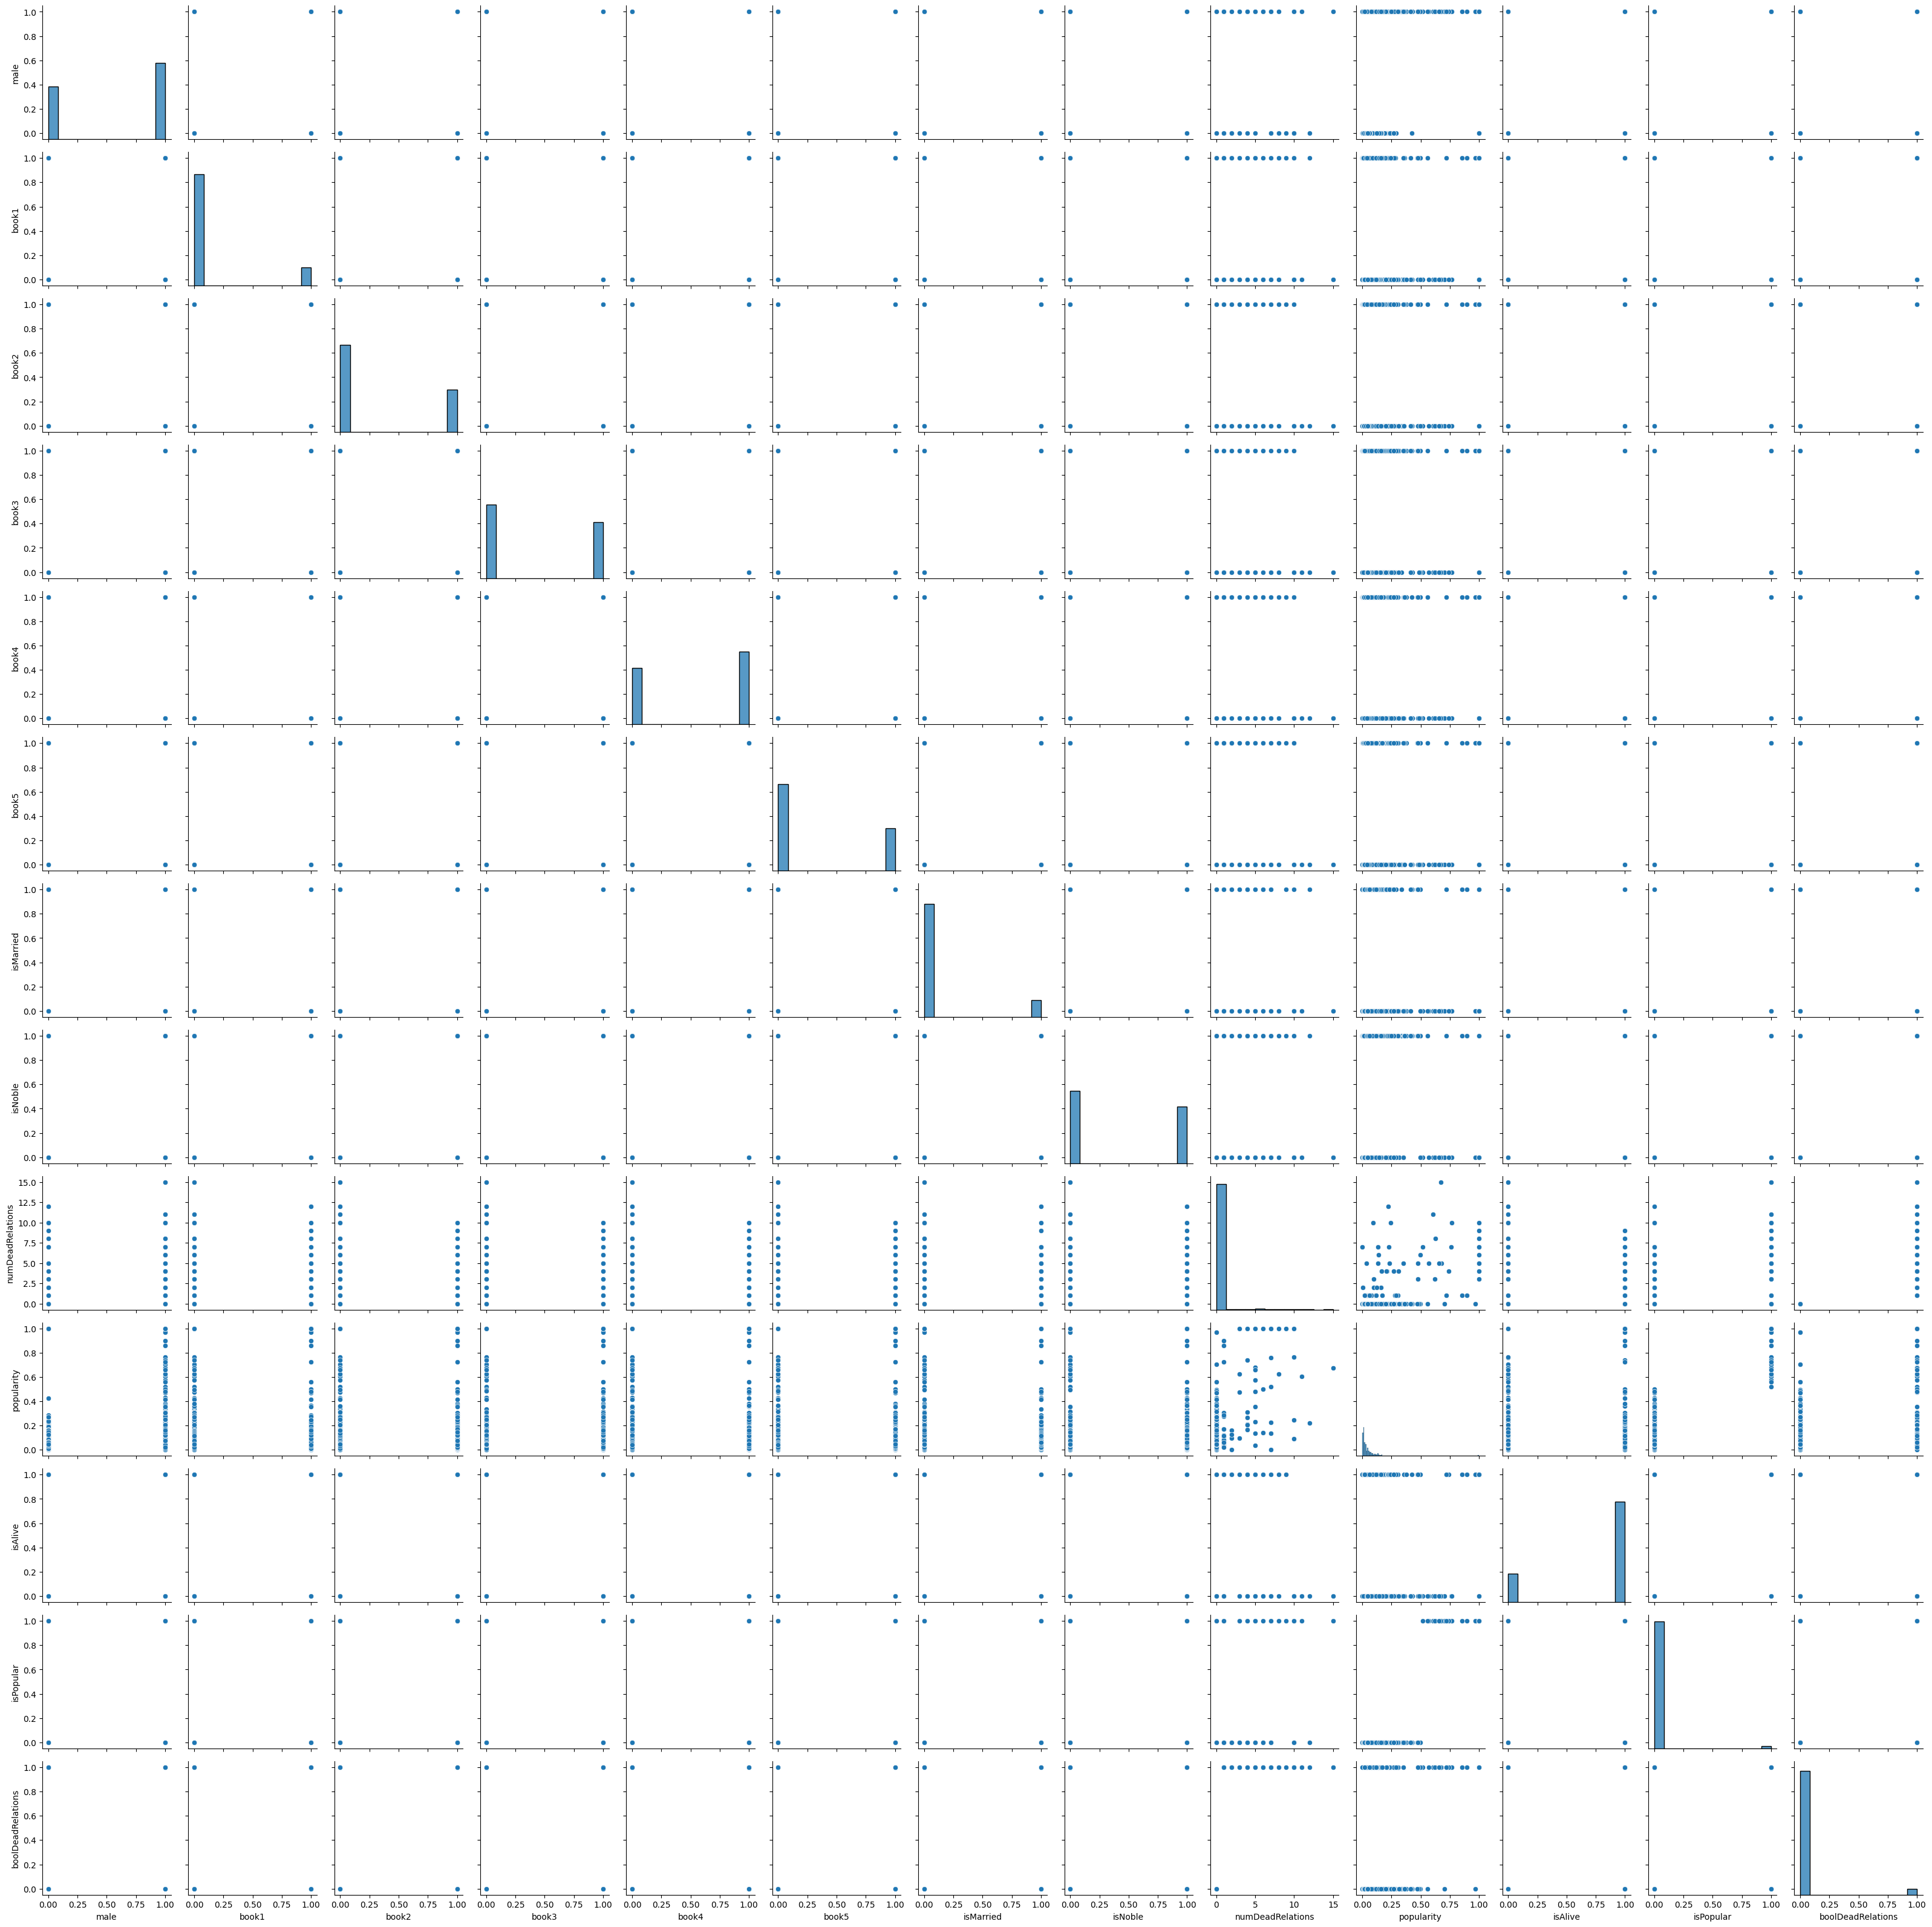

In [12]:
sns.pairplot(data)

In [479]:
data.drop(columns=['popularity', 'numDeadRelations'], inplace = True)
data_test.drop(columns=['popularity', 'numDeadRelations'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [480]:
data.groupby('isAlive')['isAlive'].count()

,isAlive
isAlive,
0,345
1,1212


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [481]:
data.dtypes

,0
male,int64
culture,object
house,object
book1,int64
book2,int64
book3,int64
book4,int64
book5,int64
isMarried,int64
isNoble,int64


In [482]:
data.culture.nunique()

48

In [483]:
data.house.nunique()

315

In [329]:
# from sklearn.preprocessing import OneHotEncoder

# enc = OneHotEncoder(handle_unknown='ignore')
# one_hot_encoded = enc.fit_transform(data[['culture']])
# enc_df = pd.DataFrame(one_hot_encoded.toarray(), columns = enc.get_feature_names_out(['culture']))
# enc_df.index = enc_df.index + 1
# data = data.join(enc_df)
# data = data.drop(columns = 'culture')

# enc_test = OneHotEncoder(handle_unknown='ignore')
# one_hot_encoded_test = enc_test.fit_transform(data_test[['culture']])
# enc_df_test = pd.DataFrame(one_hot_encoded_test.toarray(), columns = enc_test.get_feature_names_out(['culture']))
# enc_df_test.index = enc_df_test.index + 1
# data_test = data_test.join(enc_df_test)
# data_test = data_test.drop(columns = 'culture')

In [484]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

data['house'] = labelencoder.fit_transform(data['house'])
data_test['house'] = labelencoder.fit_transform(data_test['house'])

data['culture'] = labelencoder.fit_transform(data['culture'])
data_test['culture'] = labelencoder.fit_transform(data_test['culture'])

<Axes: >

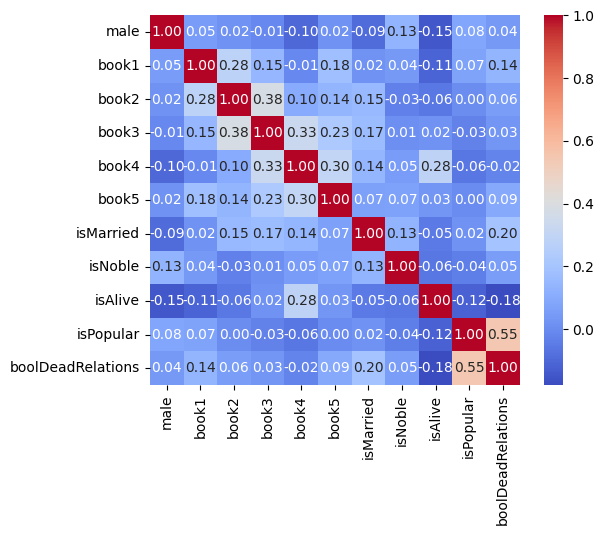

In [485]:
sns.heatmap(data[['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble', 'isAlive', 'isPopular', 'boolDeadRelations']].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
# ...

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [486]:
data.columns = data.columns.astype(str)

In [487]:
X = data.drop(columns = ['isAlive'])
y = data['isAlive']

In [488]:
pd.set_option('display.max_columns', None)
X

,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,
1,1,24,106,0,0,0,0,0,0,0,1,1
2,1,31,106,1,1,1,1,1,1,1,1,1
3,1,24,244,0,0,0,1,0,0,1,0,0
4,0,24,21,0,0,0,0,0,1,1,0,0
5,0,7,219,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,24,106,1,0,1,1,0,0,1,0,0
1554,0,24,106,1,1,0,0,0,0,0,0,0
1555,1,24,222,0,1,1,1,1,0,0,0,0


**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [489]:
from sklearn.model_selection import train_test_split

In [490]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [491]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [493]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [494]:
from sklearn.model_selection import GridSearchCV

In [495]:
# from imblearn.under_sampling import TomekLinks

# tomek = TomekLinks()
# X_train_resampled, y_train_resampled = tomek.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = X_train, y_train

In [496]:
X_test, data_test

(      male  culture  house  book1  book2  book3  book4  book5  isMarried  \
 S.No                                                                       
 1497     1        7    190      1      1      1      1      1          1   
 169      1       15    230      0      0      0      1      0          0   
 354      1       24    106      0      1      0      0      0          0   
 469      0       13    106      0      0      0      0      1          0   
 1411     0       24    284      0      1      1      1      0          1   
 ...    ...      ...    ...    ...    ...    ...    ...    ...        ...   
 1389     1       24    257      0      0      1      1      0          1   
 661      0        4    106      0      0      0      1      0          0   
 141      1       28    309      0      0      1      0      0          0   
 1143     0       24    152      1      1      1      1      1          0   
 1041     1       24     67      0      0      0      1      0          1   

In [497]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_resampled)
# X_test_scaled = scaler.transform(X_test)
# X_final_scaled = scaler.transform(data_test)
X_train_scaled = X_train_resampled
X_test_scaled = X_test
X_final_scaled = data_test

In [498]:
from sklearn.metrics import accuracy_score
# Шаг 1. создание модели
logistic_regression = LogisticRegression()

# Шаг 2. Определение параметров для поиска
param_grid = {
    'C': [0.01, 0.1, 0.5, 1, 2, 3, 5, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l2', 'l1', 'elasticnet']
}

# Шаг 3. Настройка Grid Search
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid,
                           scoring='accuracy', cv=10, n_jobs=-1, verbose=1)

# Шаг 4. Обучение модели с использованием Grid Search
grid_search.fit(X_train_scaled, y_train_resampled)

# Шаг 5. Результаты
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score: %.4f" % grid_search.best_score_)

# Шаг 6. Обучение модели с наилучшими параметрами
best_model_logreg = grid_search.best_estimator_
best_model_logreg.fit(X_train_scaled, y_train_resampled)

# Шаг 7. Предсказание на тестовых данных
y_pred_best_logreg = best_model_logreg.predict(X_test_scaled)
y_pred_best_logreg_final = best_model_logreg.predict(X_final_scaled)


# Шаг 8. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_best_logreg)
print("Accuracy on Test Data: %.4f" % accuracy)

Fitting 10 folds for each of 135 candidates, totalling 1350 fits
Best Parameters: {'C': 2, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.8150
Accuracy on Test Data: 0.7568


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
720 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "

In [499]:
#заодно посмотрим feature importance, потому что сейчас лучший скор 0.78 - маловато
feature_importance_logreg = best_model_logreg.coef_[0]  #для логрега важность признаков определяется по коэффициентам
importance_df_logreg = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_logreg
})

importance_df_logreg = importance_df_logreg.sort_values(by='Importance', ascending=False)
print(importance_df_logreg.head(50))

              Feature  Importance
6               book4    1.668885
2               house   -0.000658
1             culture   -0.022360
7               book5   -0.140348
10          isPopular   -0.157937
8           isMarried   -0.217690
5               book3   -0.251585
9             isNoble   -0.277618
4               book2   -0.388433
3               book1   -0.571041
0                male   -0.609958
11  boolDeadRelations   -1.477733


In [500]:
# Убираем признаки с важностью <= 0
important_features = importance_df_logreg[importance_df_logreg['Importance'] > -0.02]['Feature'].tolist()

X_train_filtered = scaler.fit_transform(X_train_resampled[important_features])
X_test_filtered = scaler.transform(X_test[important_features])

param_grid = {
    'C': [0.01, 0.1, 0.5, 1, 3, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l2', 'l1', 'elasticnet']
}

new_logistic_regression = LogisticRegression()

grid_search = GridSearchCV(estimator=new_logistic_regression, param_grid=param_grid,
                           scoring='accuracy', cv=10, n_jobs=-1, verbose=1)

grid_search.fit(X_train_filtered, y_train_resampled)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score: %.4f" % grid_search.best_score_)

best_model_new_logreg = grid_search.best_estimator_
best_model_new_logreg.fit(X_train_filtered, y_train_resampled)

y_pred_filtered = best_model_new_logreg.predict(X_test_filtered)

# Шаг 8. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred_filtered)
print("Accuracy on Test Data: %.4f" % accuracy)

Fitting 10 folds for each of 105 candidates, totalling 1050 fits
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Cross-Validation Score: 0.7939
Accuracy on Test Data: 0.7471


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
560 fits failed out of a total of 1050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "

In [172]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [510]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Определение моделей и их сеток параметров
models_with_params = {
    "Logistic Regression": {
        "model": LogisticRegression(),
        "params": {
            'C': [0.01, 0.1, 0.5, 1, 2, 3, 5, 10],
            'solver': ['newton-cg', 'lbfgs', 'liblinear'],
            'penalty': ['l2']
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(),
        "params": {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 0.5, 1]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 10, 20, 30]
        }
    },
    "K-Neighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    "Support Vector Classifier": {
        "model": SVC(),
        "params": {
            'C': [0.01, 0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            'max_depth': [None, 10, 20, 30],
            'criterion': ['gini', 'entropy']
        }
    },
    "CatBoost": {  # Добавление CatBoostClassifier
        "model": CatBoostClassifier(silent=True),
        "params": {
            'iterations': [100, 200, 500],
            'learning_rate': [0.01, 0.1, 0.3],
            'depth': [4, 6, 8]
        }
    },
    "XGBoost": {  # Добавление XGBoostClassifier
        "model": XGBClassifier(eval_metric='mlogloss', use_label_encoder=False),  # eval_metric для XGBoost
        "params": {
            'n_estimators': [100, 200, 500],
            'learning_rate': [0.01, 0.1, 0.3],
            'max_depth': [4, 6, 8]
        }
    },
    "LightGBM": {  # Добавление LightGBMClassifier
        "model": LGBMClassifier(),
        "params": {
            'n_estimators': [100, 200, 500],
            'learning_rate': [0.01, 0.1, 0.3],
            'max_depth': [-1, 4, 6, 8]  # -1 для неограниченной глубины
        }
    }
}

# Словарь для хранения результатов
results = {}

# Цикл по моделям
for model_name, mp in models_with_params.items():
    model = mp['model']
    param_grid = mp['params']

    # Настройка Grid Search
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               scoring='accuracy', cv=10, n_jobs=-1, verbose=1)

    # Обучение с использованием Grid Search
    print(f"Fitting {model_name}...")
    grid_search.fit(X_train, y_train)

    # Лучшая модель и предсказание
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    y_pred_final = best_model.predict(X_final_scaled)

    # Оценка точности
    accuracy = accuracy_score(y_test, y_pred)

    # Сохранение результатов
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'accuracy': accuracy,
        'y_pred': y_pred,
        'y_pred_final': y_pred_final
    }

# Вывод результатов
for model_name, result in results.items():
    print(f"{model_name}: Best Params: {result['best_params']}, Accuracy: {result['accuracy']:.4f}")


Fitting Logistic Regression...
Fitting 10 folds for each of 24 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting AdaBoost...
Fitting 10 folds for each of 12 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Fitting Random Forest...
Fitting 10 folds for each of 12 candidates, totalling 120 fits
Fitting K-Neighbors...
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting Support Vector Classifier...
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting Decision Tree...
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting CatBoost...
Fitting 10 folds for each of 27 candidates, totalling 270 fits
Fitting XGBoost...
Fitting 10 folds for each of 27 candidates, totalling 270 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:44:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting LightGBM...
Fitting 10 folds for each of 36 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Number of positive: 828, number of negative: 215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 245
[LightGBM] [Info] Number of data points in the train set: 1043, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.793864 -> initscore=1.348375
[LightGBM] [Info] Start training from score 1.348375
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [511]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [512]:
# Шаг 3. Предсказание на тестовых данных
y_pred = best_model_logreg.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7568


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [513]:
predictions

{'best_params': {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500},
 'accuracy': 0.7704280155642024,
 'y_pred': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 

In [514]:
for model_name, predictions in results.items():
  accuracy = accuracy_score(y_test, predictions['y_pred'])
  print(f"Accuracy for model {model_name}: %.4f" % accuracy)

Accuracy for model Logistic Regression: 0.7568
Accuracy for model AdaBoost: 0.7763
Accuracy for model Random Forest: 0.7685
Accuracy for model K-Neighbors: 0.7393
Accuracy for model Support Vector Classifier: 0.7451
Accuracy for model Decision Tree: 0.7471
Accuracy for model CatBoost: 0.7763
Accuracy for model XGBoost: 0.7490
Accuracy for model LightGBM: 0.7704


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [515]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.17MB/s]


In [516]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [519]:
for model_name, result in results.items():
  submission['isAlive'] = result['y_pred_final']
  submission.to_csv(f"/content/new_submission_{model_name}.csv", index=False)

In [286]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [415]:
submission['isAlive'] = y_pred_best_logreg_final

Как сохранить измененный Pandas DataFrame в csv файл:

In [416]:
submission.to_csv("/content/new_submission.csv", index=False)

Лучшим оказался random_forest